In [ ]:

##  Theoretical Questions – Clustering


In [1]:
# Q1. What is unsupervised learning in the context of machine learning?
   
# Unsupervised learning involves training algorithms on data that has no labeled responses. The goal is to find hidden patterns or intrinsic structures, such as grouping data into clusters.

In [2]:
# 2. How does K-Means clustering algorithm work?

#    K-Means partitions the dataset into K clusters by:

#     Randomly initializing K centroids.
#     Assigning each data point to the nearest centroid.
#     Recomputing centroids as the mean of assigned points.
#     Repeating until centroids stabilize.


In [3]:
# Q3. Explain the concept of a dendrogram in hierarchical clustering.

#   A dendrogram is a tree-like diagram that shows the arrangement of clusters produced by hierarchical clustering. It helps visualize the process of merging (or splitting) clusters and determine the optimal number of clusters.


In [4]:
# Q4. What is the Main difference between K-Means and Hierarchical Clustering:

#    K-Means: Requires specifying number of clusters; iterative; efficient.
#    Hierarchical: No need to predefine K; forms a hierarchy; slower on large data.

In [5]:
# Q5. What are the Advantages of DBSCAN over K-Means:

#     Can find arbitrarily shaped clusters.
#     No need to specify number of clusters.
#     Identifies noise/outliers naturally.

In [6]:
# Q6. When would you use Silhouette Score in clustering?

#  To measure how well each data point fits within its cluster versus others. Used to evaluate and compare clustering performance.


In [7]:
#Q7. What are the limitations of Hierarchical Clustering

#    Computationally expensive.
#    Sensitive to noise and outliers.
#    No way to correct poor merges.

In [8]:
#Q8. Why is feature scaling important in K-Means?

#    Because K-Means uses Euclidean distance, unscaled features can distort cluster assignments.


In [9]:
# Q9. How does DBSCAN identify noise points?
  
#     Points not within ε-distance of a minimum number of neighbors (MinPts) are labeled as noise.


In [10]:
# Q10. Define inertia in K-Means:

#     The sum of squared distances of samples to their nearest cluster center. Lower inertia indicates tighter clusters.


In [11]:
# Q11. What is the elbow method in K-Means clustering?
   
#   A method to determine optimal K by plotting inertia vs K and identifying the "elbow" point where adding more clusters yields minimal gain.


In [12]:
# Q12. Describe “density” in DBSCAN:

#     Density is defined by the number of points within a specified radius (ε). High density = cluster; low = noise.


In [13]:
# Q13. Can hierarchical clustering be used on categorical data?

#   Yes, with appropriate distance metrics (e.g., Hamming distance), but not directly using Euclidean distance.


In [14]:
# Q14. What does a negative Silhouette Score indicate?

#     That a data point may be assigned to the wrong cluster.


In [15]:
# 15. Explain "linkage criteria" in hierarchical clustering:

#  Linkage determines the distance between clusters:

# Single: min distance
# Complete: max distance
# Average: mean distance
# Ward: minimizes variance

In [16]:
# Q16. Why might K-Means perform poorly on clusters with varying sizes/densities?

#     Because it assumes equal-sized spherical clusters. It struggles with irregular shapes and density variations.


In [17]:
# Q17. What are the Core parameters in DBSCAN:

# ε (epsilon): radius for neighborhood
# MinPts: minimum points to form a dense region
#   Both affect cluster shape and noise detection.


In [18]:
# Q18. How does K-Means++ improve standard K-Means?

#     It selects initial centroids in a smarter way—spread out—to improve clustering quality and convergence.


In [19]:
# Q19. What is Agglomerative Clustering?

#     A bottom-up hierarchical method where each data point starts as its own cluster, and closest clusters are merged iteratively.


In [20]:
# 20. Why is Silhouette Score better than inertia?

#     Inertia only measures compactness, not separation. Silhouette combines both cohesion and separation, giving a better sense of cluster quality.


# Practical


In [21]:
#Q21 Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot 

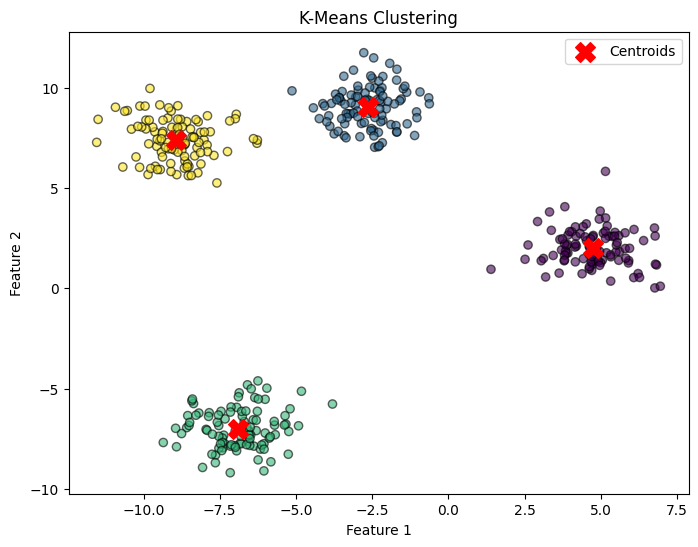

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data with 4 centers
X, y = make_blobs(n_samples=400, centers=4, random_state=42, cluster_std=1.0)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# Visualize using a scatter plot
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', edgecolors='k', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Centroids')  # Mark centroids
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [23]:
# Q22 Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Apply Agglomerative Clustering with 3 clusters
agg_clustering = AgglomerativeClustering(n_clusters=3)
labels = agg_clustering.fit_predict(X)

# Display the first 10 predicted labels
print("First 10 predicted labels:", labels[:10])


First 10 predicted labels: [1 1 1 1 1 1 1 1 1 1]


In [25]:
#Q23 Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot

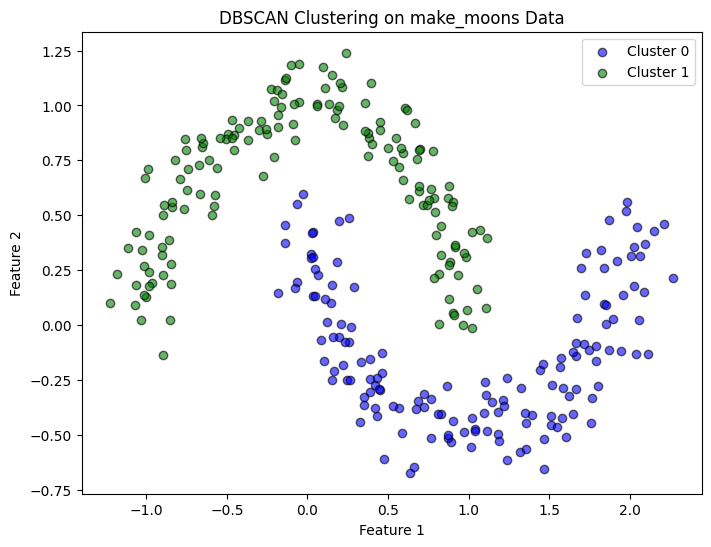

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Generate synthetic data
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)  # Adjust parameters for better clustering
labels = dbscan.fit_predict(X)

# Identify core points, boundary points, and outliers
unique_labels = set(labels)
colors = ['blue', 'green', 'purple', 'orange']
outlier_color = 'red'

plt.figure(figsize=(8,6))
for label in unique_labels:
    if label == -1:  # Outliers are labeled as -1
        color = outlier_color
    else:
        color = colors[label % len(colors)]
    
    plt.scatter(X[labels == label][:, 0], X[labels == label][:, 1], 
                c=color, edgecolors='k', alpha=0.6, label=f'Cluster {label}' if label != -1 else 'Outliers')

plt.title('DBSCAN Clustering on make_moons Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [27]:
#Q24 Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster

In [28]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the Wine dataset
wine = load_wine()
X = wine.data

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# Print the size of each cluster
cluster_sizes = pd.Series(labels).value_counts().sort_index()
print("Cluster sizes:\n", cluster_sizes)


Cluster sizes:
 0    65
1    51
2    62
Name: count, dtype: int64


In [29]:
#Q25 Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result

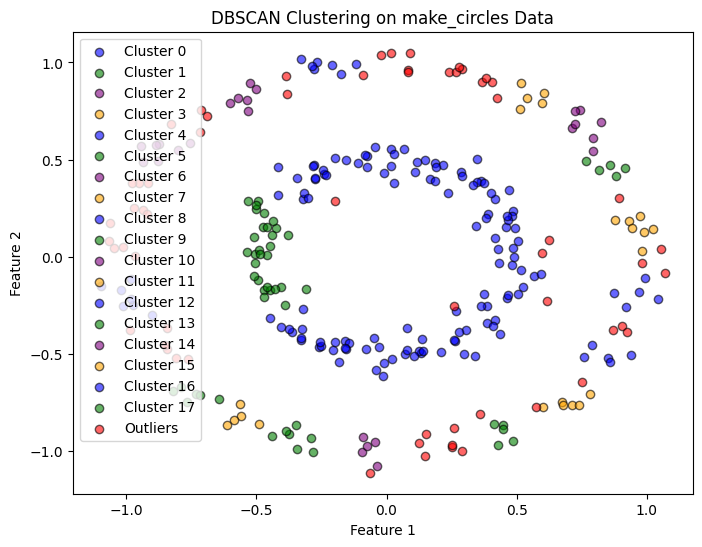

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN

# Generate synthetic data
X, _ = make_circles(n_samples=300, noise=0.05, factor=0.5, random_state=42)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.1, min_samples=5)  # Adjust parameters for better clustering
labels = dbscan.fit_predict(X)

# Identify core points, boundary points, and outliers
unique_labels = set(labels)
colors = ['blue', 'green', 'purple', 'orange']
outlier_color = 'red'

plt.figure(figsize=(8,6))
for label in unique_labels:
    if label == -1:  # Outliers are labeled as -1
        color = outlier_color
    else:
        color = colors[label % len(colors)]
    
    plt.scatter(X[labels == label][:, 0], X[labels == label][:, 1], 
                c=color, edgecolors='k', alpha=0.6, label=f'Cluster {label}' if label != -1 else 'Outliers')

plt.title('DBSCAN Clustering on make_circles Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [31]:
#Q26 Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids

In [32]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data

# Apply MinMaxScaler to scale features between 0 and 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Output the cluster centroids
centroids = kmeans.cluster_centers_
print("Cluster centroids:\n", centroids)


Cluster centroids:
 [[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


In [33]:
#Q27 Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN

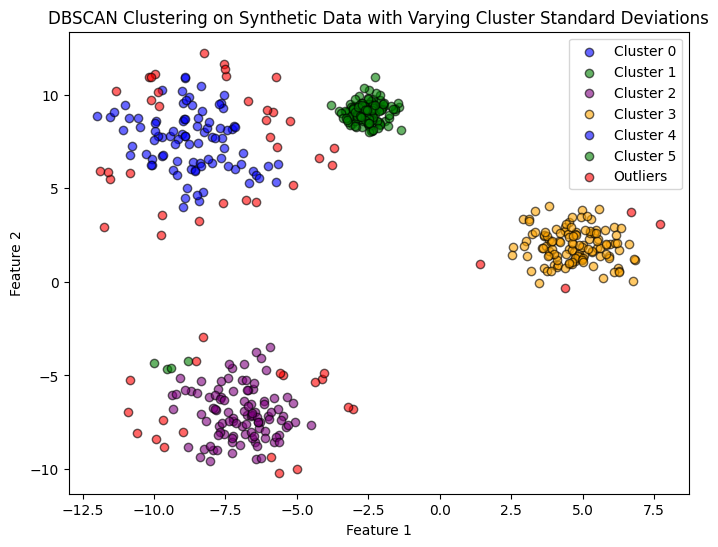

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

# Generate synthetic data with varying cluster standard deviations
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=[0.5, 1.0, 1.5, 2.0], random_state=42)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.75, min_samples=5)  # Adjust parameters for better clustering
labels = dbscan.fit_predict(X)

# Identify core points, boundary points, and outliers
unique_labels = set(labels)
colors = ['blue', 'green', 'purple', 'orange']
outlier_color = 'red'

plt.figure(figsize=(8,6))
for label in unique_labels:
    if label == -1:  # Outliers are labeled as -1
        color = outlier_color
    else:
        color = colors[label % len(colors)]
    
    plt.scatter(X[labels == label][:, 0], X[labels == label][:, 1], 
                c=color, edgecolors='k', alpha=0.6, label=f'Cluster {label}' if label != -1 else 'Outliers')

plt.title('DBSCAN Clustering on Synthetic Data with Varying Cluster Standard Deviations')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [35]:
#Q28 Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means

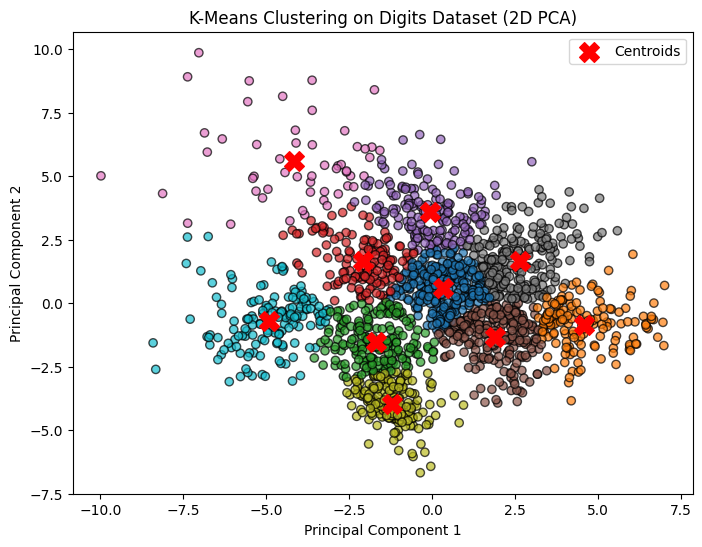

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load the Digits dataset
digits = load_digits()
X = digits.data

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply K-Means clustering with 10 clusters (since digits range from 0-9)
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_pca)

# Visualize the clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', edgecolors='k', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Centroids')  # Highlight centroids
plt.title('K-Means Clustering on Digits Dataset (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [37]:
#Q29 Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart

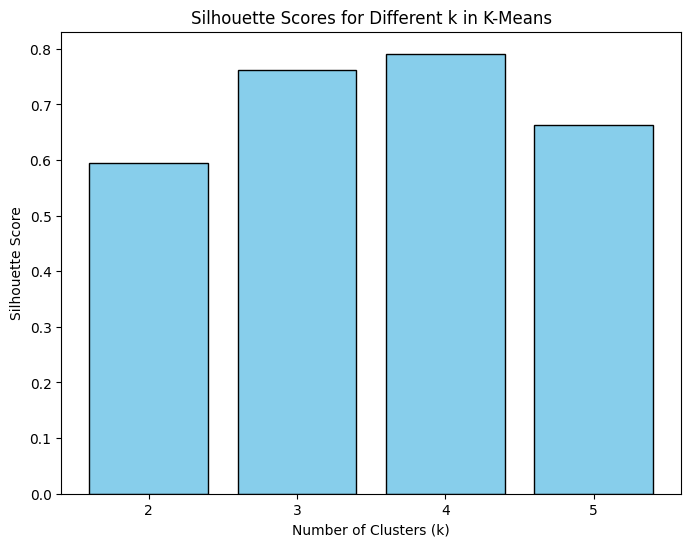

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generate synthetic data
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

# Evaluate silhouette scores for k = 2 to 5
k_values = range(2, 6)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Display silhouette scores as a bar chart
plt.figure(figsize=(8,6))
plt.bar(k_values, silhouette_scores, color='skyblue', edgecolor='black')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k in K-Means')
plt.xticks(k_values)
plt.show()


In [39]:
#Q30 Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage

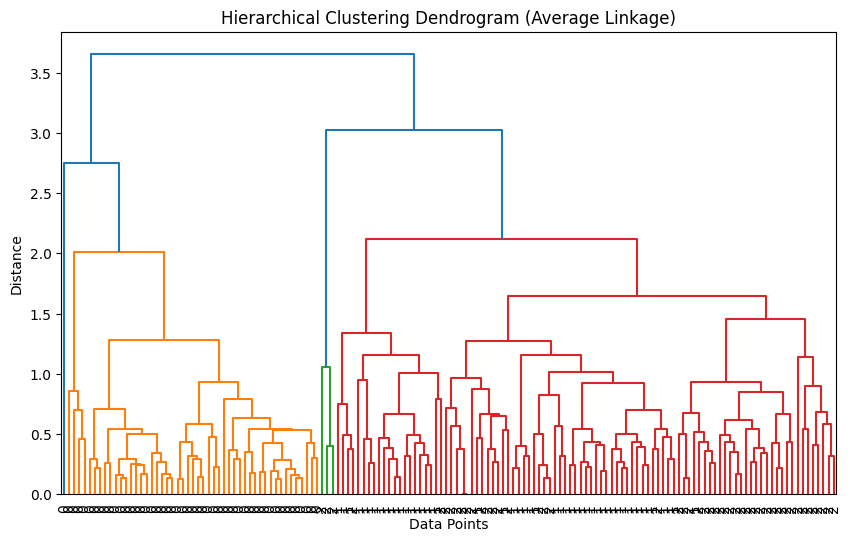

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Standardize the features for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform hierarchical clustering with average linkage
linkage_matrix = sch.linkage(X_scaled, method='average')

# Plot the dendrogram
plt.figure(figsize=(10,6))
sch.dendrogram(linkage_matrix, labels=iris.target, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram (Average Linkage)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


In [41]:
#Q31 Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with decision boundaries

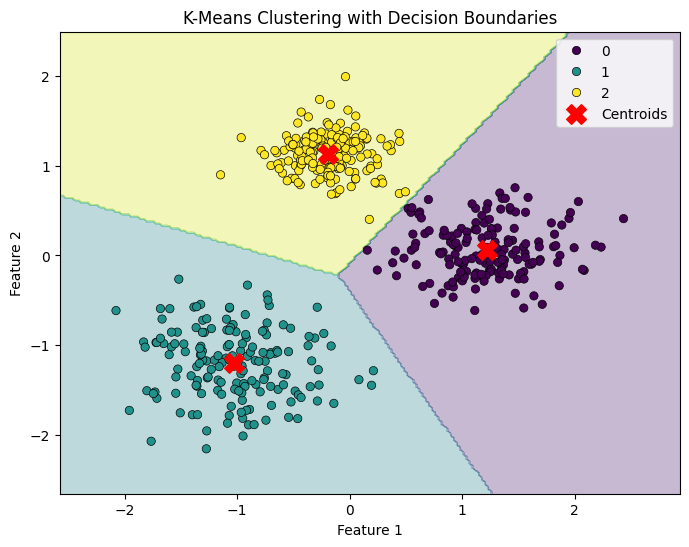

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Generate synthetic data with overlapping clusters
X, _ = make_blobs(n_samples=500, centers=3, cluster_std=[1.5, 2.0, 2.5], random_state=42)

# Standardize the data for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# Visualize decision boundaries
x_min, x_max = X_scaled[:, 0].min() - 0.5, X_scaled[:, 0].max() + 0.5
y_min, y_max = X_scaled[:, 1].min() - 0.5, X_scaled[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')  # Decision boundaries
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels, palette='viridis', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Centroids')  # Highlight centroids
plt.title('K-Means Clustering with Decision Boundaries')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [43]:
#Q32 Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results

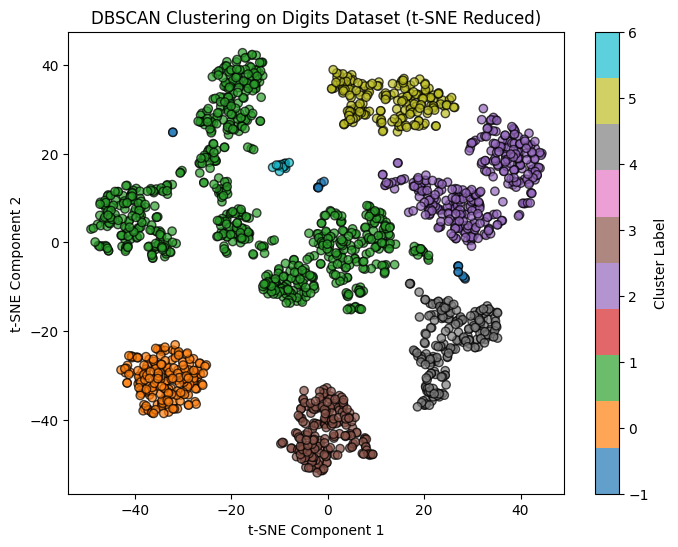

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

# Load the Digits dataset
digits = load_digits()
X = digits.data

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=5, min_samples=10)  # Adjust parameters for better clustering
labels = dbscan.fit_predict(X_tsne)

# Visualize the clusters
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', edgecolors='k', alpha=0.7)
plt.title('DBSCAN Clustering on Digits Dataset (t-SNE Reduced)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


In [45]:
#Q33 Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot the result

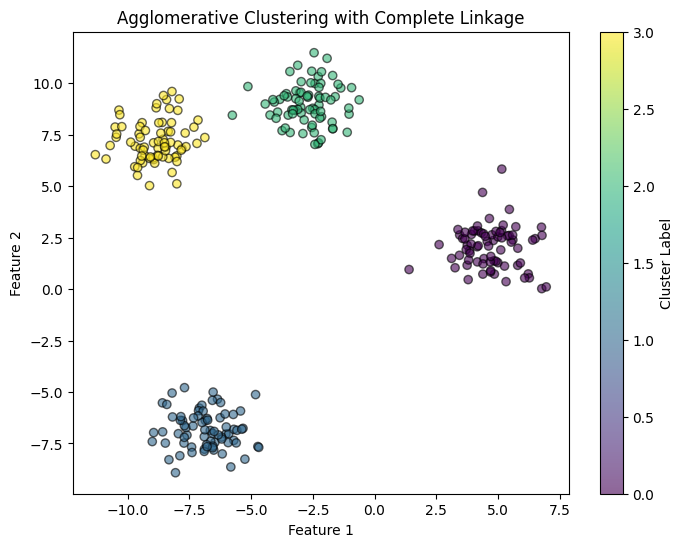

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Apply Agglomerative Clustering with complete linkage
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels = agg_clustering.fit_predict(X)

# Visualize the clustering result
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k', alpha=0.6)
plt.title('Agglomerative Clustering with Complete Linkage')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()


In [47]:
#Q34 Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a line plot

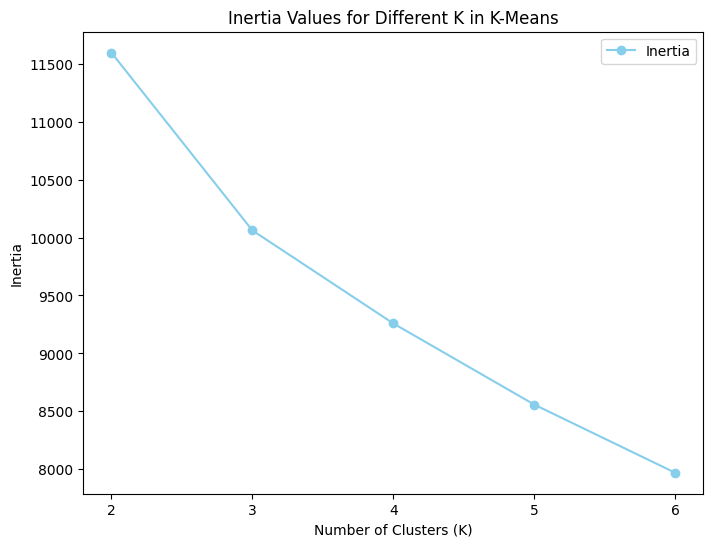

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data

# Standardize the features for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Evaluate inertia values for K = 2 to 6
k_values = range(2, 7)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Display inertia values as a line plot
plt.figure(figsize=(8,6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='skyblue', label='Inertia')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Inertia Values for Different K in K-Means')
plt.xticks(k_values)
plt.legend()
plt.show()


In [49]:
#Q35 Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage

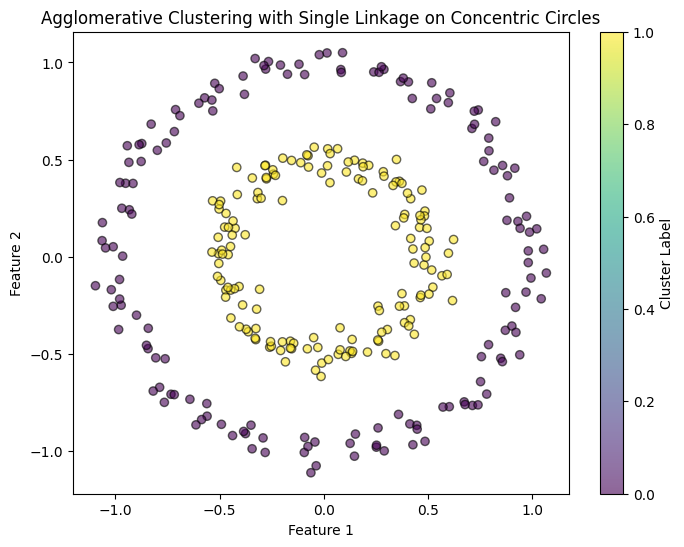

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering

# Generate synthetic data with concentric circles
X, _ = make_circles(n_samples=300, noise=0.05, factor=0.5, random_state=42)

# Apply Agglomerative Clustering with single linkage
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = agg_clustering.fit_predict(X)

# Visualize clustering result
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k', alpha=0.6)
plt.title('Agglomerative Clustering with Single Linkage on Concentric Circles')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()


In [51]:
#Q36 Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding noise)

In [52]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Load the Wine dataset
wine = load_wine()
X = wine.data

# Standardize the features for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)  # Adjust parameters for better clustering
labels = dbscan.fit_predict(X_scaled)

# Count the number of clusters (excluding noise)
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters (excluding noise):", num_clusters)


Number of clusters (excluding noise): 0


In [53]:
#Q37 Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the data points

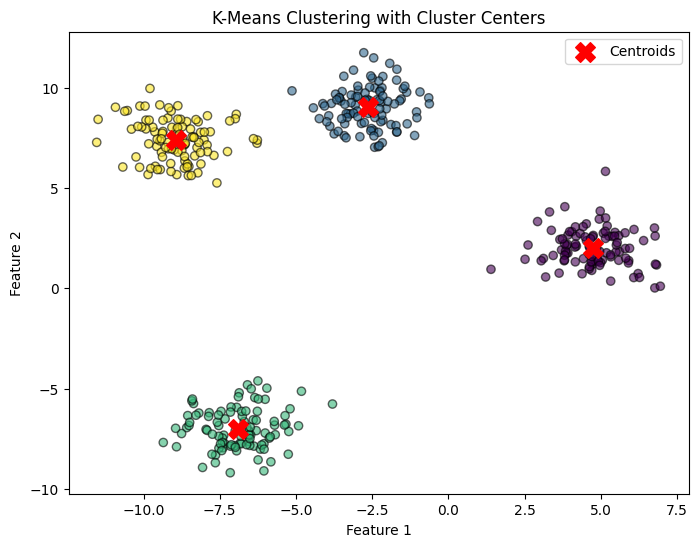

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data with 4 clusters
X, _ = make_blobs(n_samples=400, centers=4, cluster_std=1.0, random_state=42)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

# Plot the data points and cluster centers
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Centroids')  # Highlight cluster centers
plt.title('K-Means Clustering with Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [55]:
#Q38 Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise

In [56]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Standardize the features for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)  # Adjust parameters for better clustering
labels = dbscan.fit_predict(X_scaled)

# Count the number of noise samples
num_noise_samples = list(labels).count(-1)
print("Number of samples identified as noise:", num_noise_samples)


Number of samples identified as noise: 120


In [57]:
#Q39 Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the clustering result

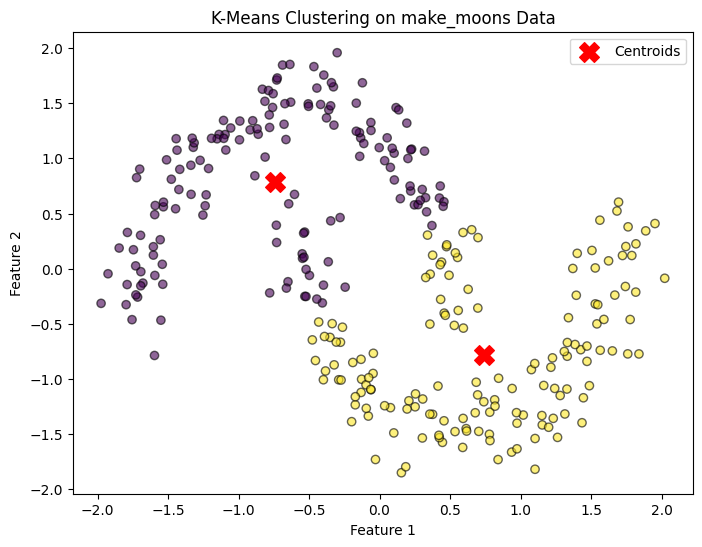

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

# Standardize the data for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# Visualize clustering result
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', edgecolors='k', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Centroids')  # Highlight centroids
plt.title('K-Means Clustering on make_moons Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [59]:
#Q40 Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D scatter plot

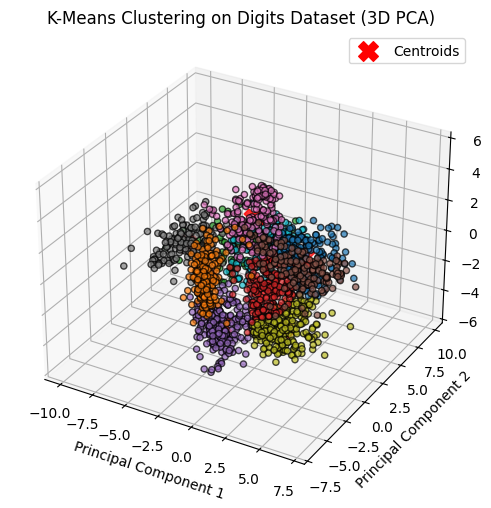

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load the Digits dataset
digits = load_digits()
X = digits.data

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce dimensionality to 3D using PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Apply K-Means clustering with 10 clusters (digits range from 0-9)
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_pca)

# Visualize the clusters in a 3D scatter plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='tab10', edgecolors='k', alpha=0.7)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], 
           c='red', marker='X', s=200, label='Centroids')  # Highlight centroids
ax.set_title('K-Means Clustering on Digits Dataset (3D PCA)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()


In [61]:
#Q41 Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the clustering

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generate synthetic data with 5 centers
X, _ = make_blobs(n_samples=500, centers=5, cluster_std=1.0, random_state=42)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

# Evaluate clustering using silhouette score
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.6786441315351273


In [63]:
#Q42 Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering. Visualize in 2D

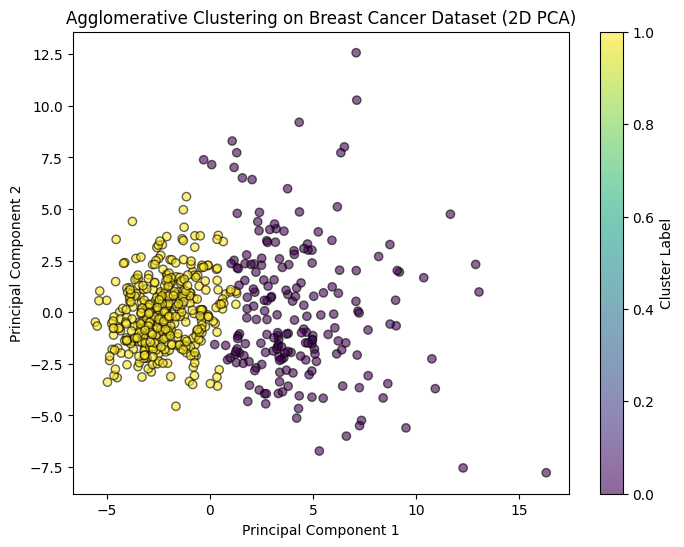

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data

# Standardize the features for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce dimensionality using PCA (2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply Agglomerative Clustering with 2 clusters
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels = agg_clustering.fit_predict(X_pca)

# Visualize clustering result
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolors='k', alpha=0.6)
plt.title('Agglomerative Clustering on Breast Cancer Dataset (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


In [65]:
#Q43 Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN side-by-side

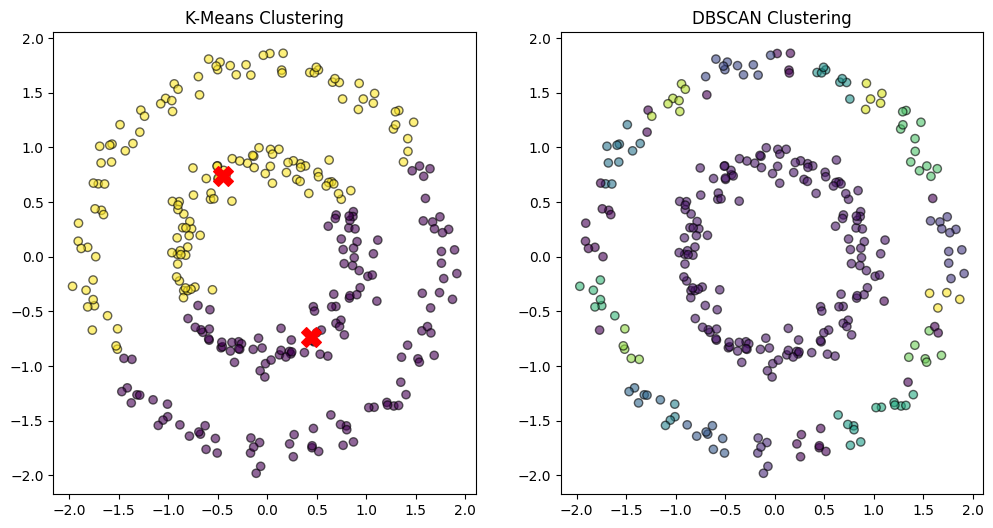

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

# Generate synthetic noisy circular data
X, _ = make_circles(n_samples=300, noise=0.05, factor=0.5, random_state=42)

# Standardize the data for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(X_scaled)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)

# Visualize clustering results side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# K-Means clustering plot
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_kmeans, cmap='viridis', edgecolors='k', alpha=0.6)
axes[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                c='red', marker='X', s=200, label='Centroids')  # Highlight centroids
axes[0].set_title('K-Means Clustering')

# DBSCAN clustering plot
axes[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_dbscan, cmap='viridis', edgecolors='k', alpha=0.6)
axes[1].set_title('DBSCAN Clustering')

plt.show()


In [67]:
#Q44 Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering

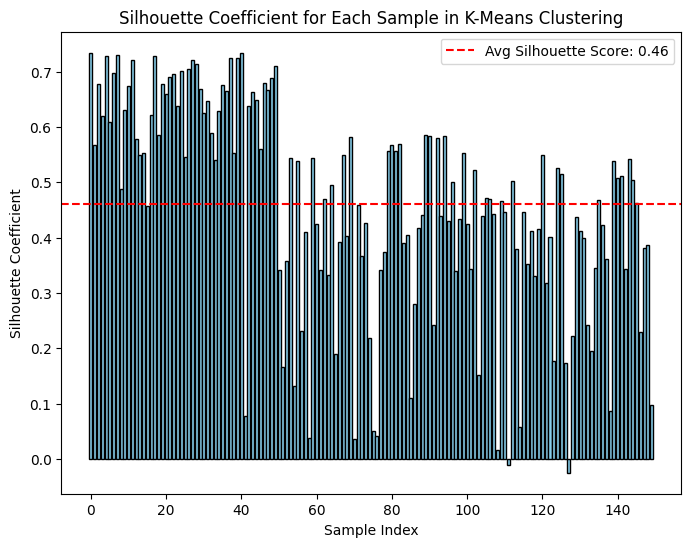

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Standardize the features for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering with 3 clusters (since Iris has 3 species)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# Compute silhouette scores for each sample
silhouette_vals = silhouette_samples(X_scaled, labels)
silhouette_avg = silhouette_score(X_scaled, labels)

# Visualize silhouette coefficients
plt.figure(figsize=(8,6))
plt.bar(range(len(silhouette_vals)), silhouette_vals, color='skyblue', edgecolor='black')
plt.axhline(y=silhouette_avg, color='red', linestyle='--', label=f'Avg Silhouette Score: {silhouette_avg:.2f}')
plt.xlabel('Sample Index')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient for Each Sample in K-Means Clustering')
plt.legend()
plt.show()


In [69]:
#Q45 Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage. Visualize clusters

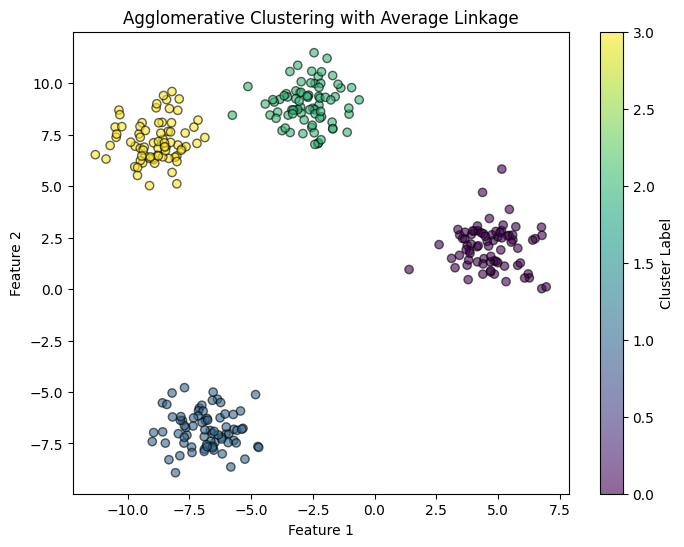

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Apply Agglomerative Clustering with average linkage
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='average')
labels = agg_clustering.fit_predict(X)

# Visualize clustering result
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k', alpha=0.6)
plt.title('Agglomerative Clustering with Average Linkage')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()


In [71]:
#Q46 Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4 features)

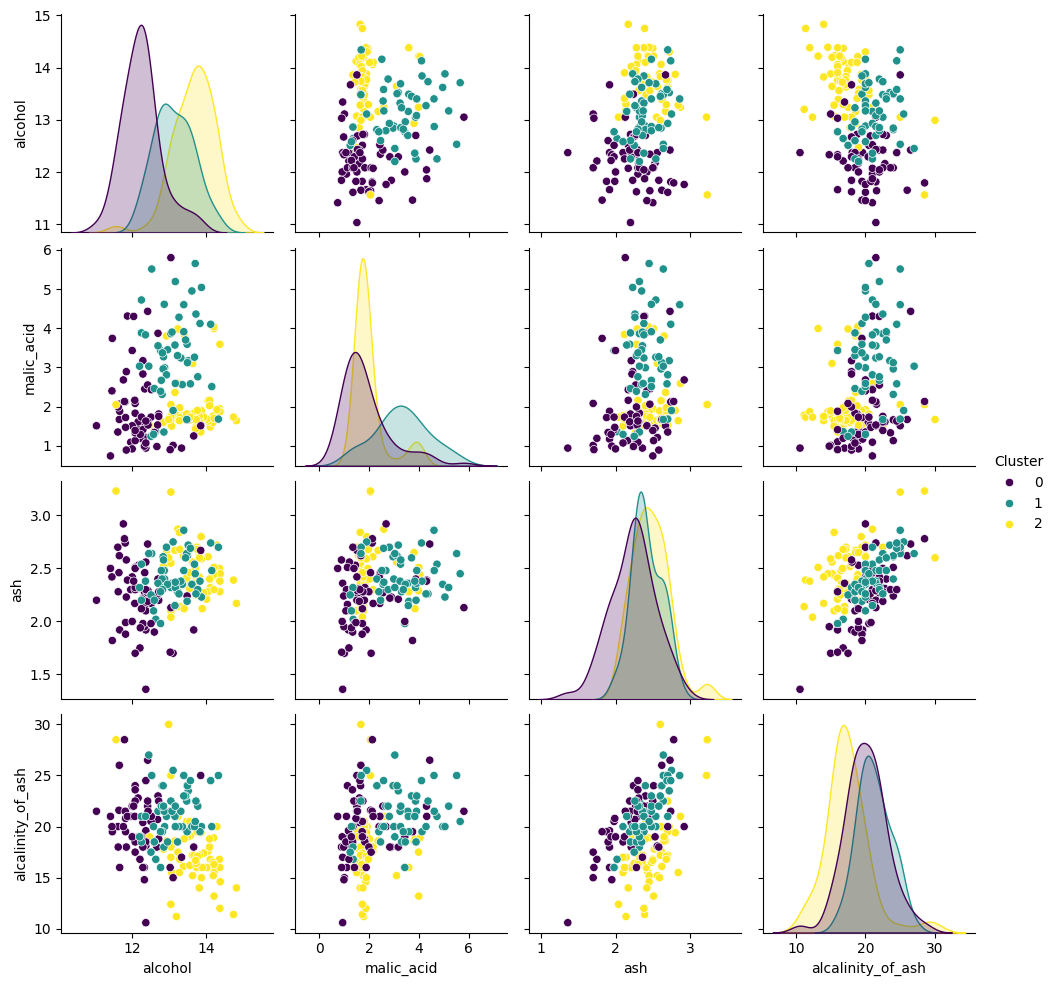

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the Wine dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)

# Standardize the features for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the DataFrame
X['Cluster'] = labels

# Visualize clusters using a Seaborn pairplot (first 4 features)
sns.pairplot(X.iloc[:, :4].join(pd.Series(labels, name='Cluster')), hue='Cluster', palette='viridis')
plt.show()


In [73]:
#Q47 Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the count

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Generate synthetic data with noise
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=[1.0, 2.0, 1.5, 2.5], random_state=42)

# Standardize the data for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Count the number of clusters (excluding noise)
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
num_noise_points = list(labels).count(-1)

print("Number of clusters (excluding noise):", num_clusters)
print("Number of noise points:", num_noise_points)


Number of clusters (excluding noise): 2
Number of noise points: 0


In [75]:
#Q48 Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the clusters.